# 1. for Diaogonal Co-variance Matrix :

Classifier Accuracy: 99.33%
Classifier Accuracy: 99.33%


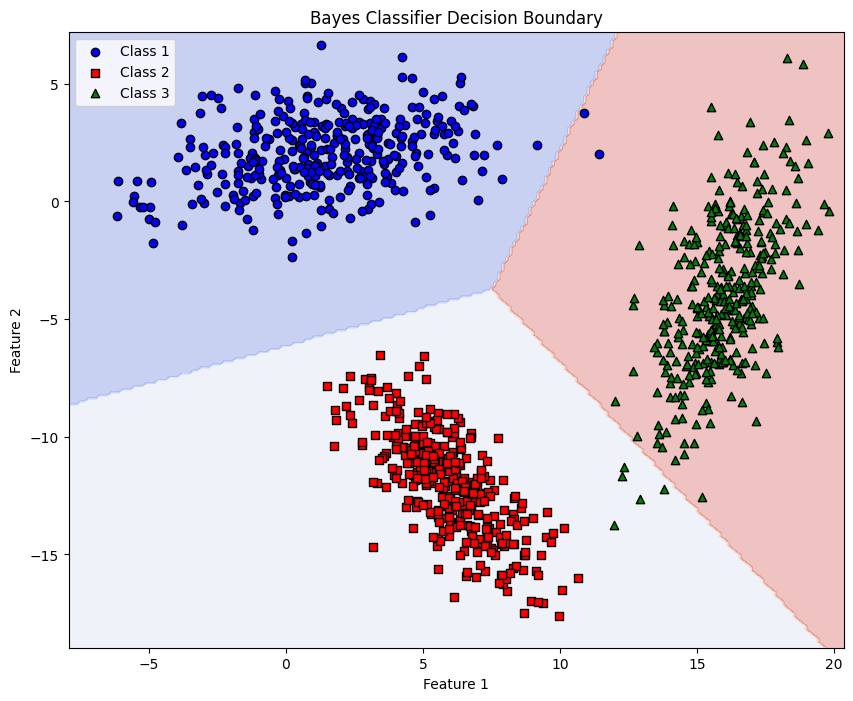

In [3]:
import numpy as np

# Function to compute the determinant of a matrix
def determinant(matrix):
    return np.linalg.det(matrix)

# Function to compute the inverse of a matrix
def inverse(matrix):
    return np.linalg.inv(matrix)

# Function to compute the multivariate Gaussian PDF manually
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = inverse(cov)
    cov_det = determinant(cov)
    norm_factor = 1.0 / (np.power(2 * np.pi, d / 2) * np.sqrt(cov_det))
    x_mu = np.array(x - mean)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, cov_inv), x_mu)
    return norm_factor * np.exp(exponent)

# Load the data from the files
class1_data = np.loadtxt('data/LS_data/Class1.txt')
class2_data = np.loadtxt('data/LS_data/Class2.txt')
class3_data = np.loadtxt('data/LS_data/Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Average the covariance matrices to get the common covariance matrix
average_cov = (cov1 + cov2 + cov3) / 3
sigma_squared = np.mean([np.var(train1), np.var(train2), np.var(train3)])

# The common covariance matrix (σ^2 * I)
common_cov = sigma_squared * np.identity(average_cov.shape[0])

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, cov, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian(x, mean, cov)
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, common_cov, priors) for x in test_data]



# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# Data visualization and decision boundary plotting
# Plot the decision boundary by creating a grid of points
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = np.array([bayes_classifier(point, means, common_cov, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')

plt.scatter(train1[:, 0], train1[:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', label='Class 2', edgecolors='k', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', label='Class 3', edgecolors='k', marker='^')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Bayes Classifier Decision Boundary')
plt.legend()
plt.show()


# 2. for Full Co-variance Matrix :

Classifier Accuracy: 99.56%
Classifier Accuracy: 99.56%


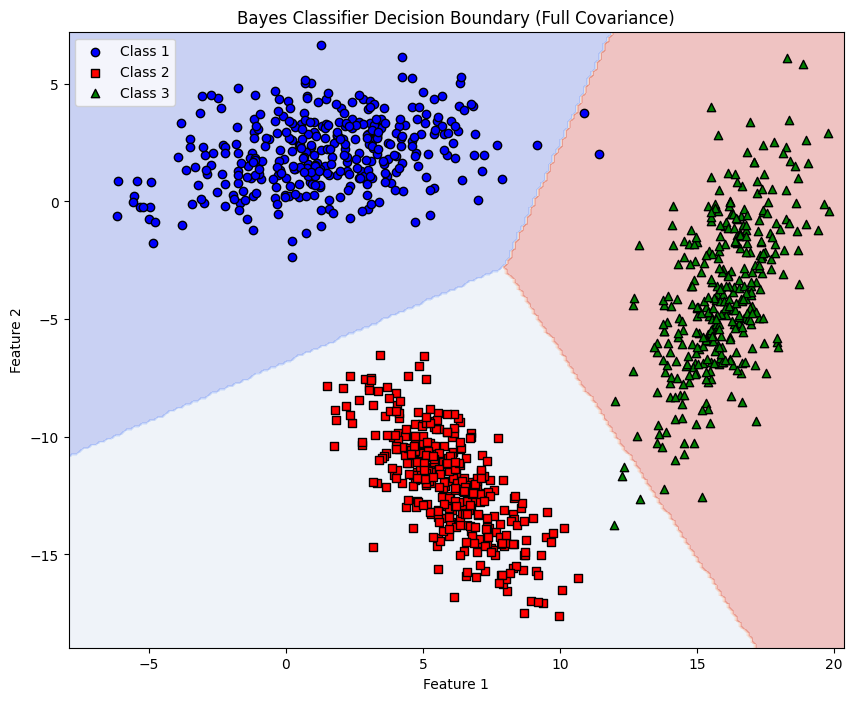

In [4]:
import numpy as np

# Function to compute the determinant of a matrix
def determinant(matrix):
    return np.linalg.det(matrix)

# Function to compute the inverse of a matrix
def inverse(matrix):
    return np.linalg.inv(matrix)

# Function to compute the multivariate Gaussian PDF manually
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = inverse(cov)
    cov_det = determinant(cov)
    norm_factor = 1.0 / (np.power(2 * np.pi, d / 2) * np.sqrt(cov_det))
    x_mu = np.array(x - mean)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, cov_inv), x_mu)
    return norm_factor * np.exp(exponent)

# Load the data from the files

# Load the data from the files
class1_data = np.loadtxt('data/LS_data/Class1.txt')
class2_data = np.loadtxt('data/LS_data/Class2.txt')
class3_data = np.loadtxt('data/LS_data/Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Average the covariance matrices to get the common covariance matrix
common_cov = (cov1 + cov2 + cov3) / 3

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, cov, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian(x, mean, cov)
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, common_cov, priors) for x in test_data]

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# Data visualization and decision boundary plotting
# Plot the decision boundary by creating a grid of points
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = np.array([bayes_classifier(point, means, common_cov, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')

plt.scatter(train1[:, 0], train1[:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', label='Class 2', edgecolors='k', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', label='Class 3', edgecolors='k', marker='^')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Bayes Classifier Decision Boundary (Full Covariance)')
plt.legend()
plt.show()


# 3. for Diaogonal Co-variance Matrix & having different for each classes :

Classifier Accuracy: 100.00%
Classifier Accuracy: 100.00%


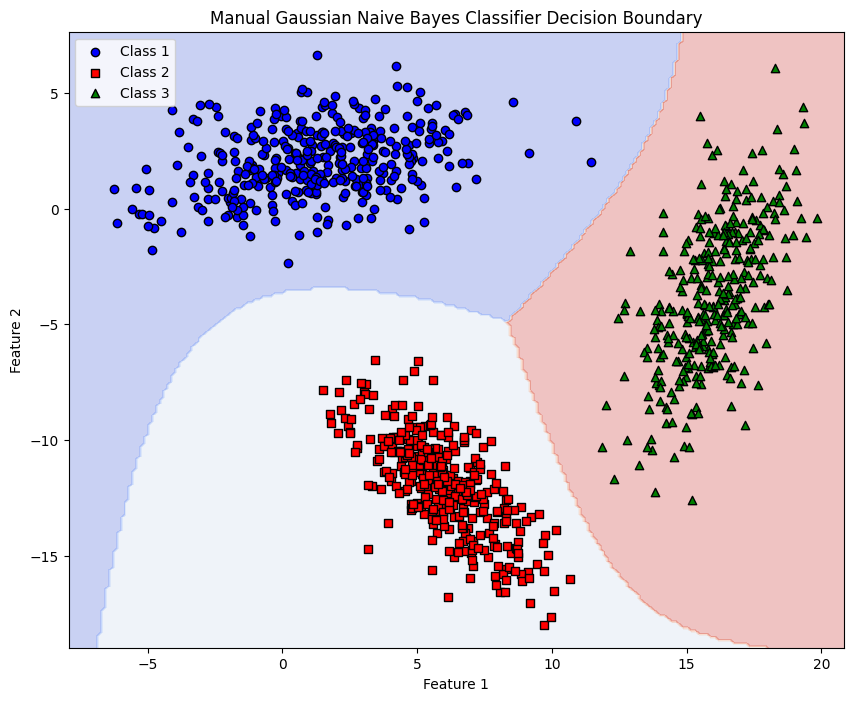

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the files

# Load the data from the files
class1_data = np.loadtxt('data/LS_data/Class1.txt')
class2_data = np.loadtxt('data/LS_data/Class2.txt')
class3_data = np.loadtxt('data/LS_data/Class3.txt')

# Combine the data and create labels
X = np.vstack((class1_data, class2_data, class3_data))
y = np.array([0]*class1_data.shape[0] + [1]*class2_data.shape[0] + [2]*class3_data.shape[0])

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, labels, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]], labels[indices[:split_idx]], labels[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the mean and covariance matrix for each class
def compute_mean_covariance(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
    return means, covariances

means, covariances = compute_mean_covariance(X_train, y_train)

# Define function to calculate multivariate Gaussian PDF manually
def multivariate_gaussian_pdf(x, mean, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det_cov))
    x_mu = np.matrix(x - mean)
    result = np.exp(-0.5 * (x_mu * inv_cov * x_mu.T))
    return norm_const * result

# Define the Bayes classifier manually
def bayes_classifier(X, means, covariances, priors):
    y_pred = []
    for x in X:
        posteriors = []
        for c in means.keys():
            prior = np.log(priors[c])
            likelihood = np.log(multivariate_gaussian_pdf(x, means[c], covariances[c]))
            posterior = prior + likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Define the priors (assuming equal priors for simplicity)
priors = {0: 1/3, 1: 1/3, 2: 1/3}

# Predict using the manual Bayes classifier
y_pred = bayes_classifier(X_test, means, covariances, priors)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
Z = bayes_classifier(grid, means, covariances, priors)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 2', edgecolors='k', marker='s')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], c='green', label='Class 3', edgecolors='k', marker='^')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Manual Gaussian Naive Bayes Classifier Decision Boundary')
plt.legend()
plt.show()


# 4. for Full Co-variance Matrix & having different for each classes :

Classifier Accuracy: 100.00%
Classifier Accuracy: 100.00%


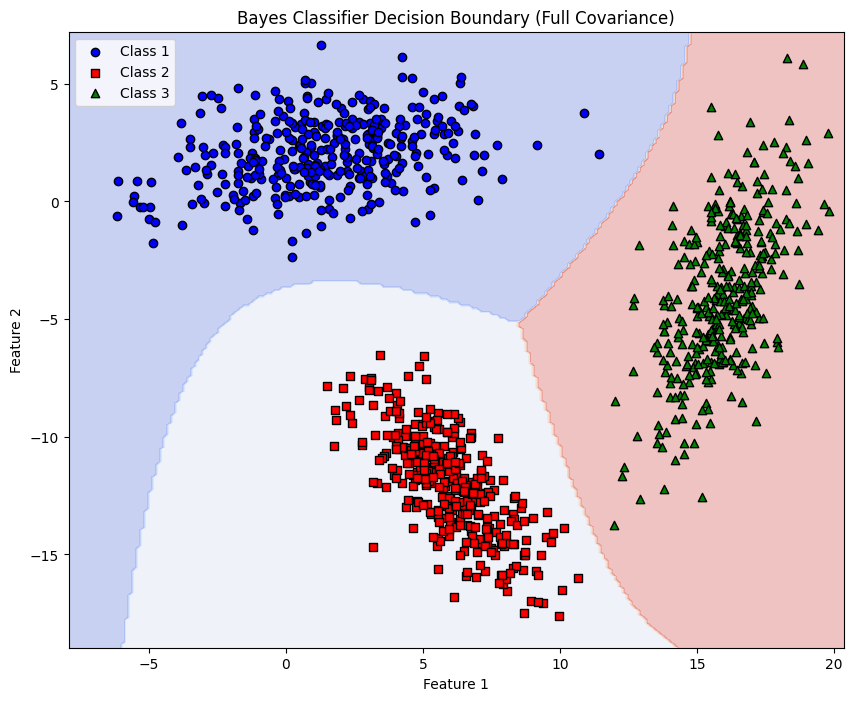

In [6]:
import numpy as np

# Function to compute the determinant of a matrix
def determinant(matrix):
    return np.linalg.det(matrix)

# Function to compute the inverse of a matrix
def inverse(matrix):
    return np.linalg.inv(matrix)

# Function to compute the multivariate Gaussian PDF manually
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = inverse(cov)
    cov_det = determinant(cov)
    norm_factor = 1.0 / (np.power(2 * np.pi, d / 2) * np.sqrt(cov_det))
    x_mu = np.array(x - mean)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, cov_inv), x_mu)
    return norm_factor * np.exp(exponent)

# Load the data from the files

# Load the data from the files
class1_data = np.loadtxt('data/LS_data/Class1.txt')
class2_data = np.loadtxt('data/LS_data/Class2.txt')
class3_data = np.loadtxt('data/LS_data/Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and full covariance matrix for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, covariances, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian(x, mean, covariances[i])
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]
covariances = [cov1, cov2, cov3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, covariances, priors) for x in test_data]

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# Data visualization and decision boundary plotting
# Plot the decision boundary by creating a grid of points
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = np.array([bayes_classifier(point, means, covariances, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')

plt.scatter(train1[:, 0], train1[:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', label='Class 2', edgecolors='k', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', label='Class 3', edgecolors='k', marker='^')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Bayes Classifier Decision Boundary (Full Covariance)')
plt.legend()
plt.show()
